In [1]:
from tensorflow.keras.datasets import mnist 
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

2022-06-22 21:32:59.241683: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-22 21:32:59.241809: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
input_ = tf.keras.layers.Input(shape=(28,28,1))

x = tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),
                           padding='valid',activation='relu',use_bias=True)(input_)

x = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),
                              padding='valid')(x)

x = tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),
                           padding='valid',activation='relu',use_bias=True)(x)

x = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),
                              padding='valid')(x)

x = tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),
                           padding='valid',activation='relu',use_bias=True)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(units=64,activation='relu')(x)
x = tf.keras.layers.Dense(units=10,activation='softmax')(x)

model = tf.keras.Model(input_,x)

2022-06-22 21:33:06.536669: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (100)
2022-06-22 21:33:06.537295: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-L6LJPH0): /proc/driver/nvidia/version does not exist
2022-06-22 21:33:06.540459: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9248  

In [6]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.1717 - sparse_categorical_accuracy: 0.9464 - val_loss: 0.0748 - val_sparse_categorical_accuracy: 0.9758
Epoch 2/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0528 - sparse_categorical_accuracy: 0.9839 - val_loss: 0.0498 - val_sparse_categorical_accuracy: 0.9844
Epoch 3/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0377 - sparse_categorical_accuracy: 0.9882 - val_loss: 0.0298 - val_sparse_categorical_accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0304 - sparse_categorical_accuracy: 0.9911 - val_loss: 0.0331 - val_sparse_categorical_accuracy: 0.9898
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0263 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.0364 - val_sparse_categorical_accuracy: 0.9895
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.

In [7]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.0458 - sparse_categorical_accuracy: 0.9897


[0.04581766948103905, 0.9897000193595886]

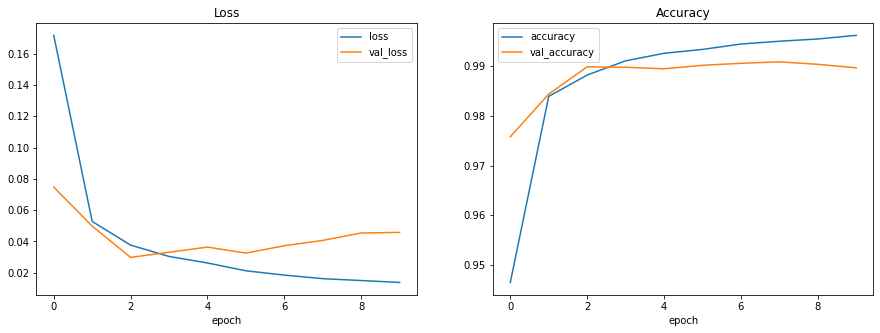

In [8]:
loss = history.history['loss']
accuracy = history.history['sparse_categorical_accuracy']

val_loss = history.history['val_loss']
val_accuracy = history.history['val_sparse_categorical_accuracy']

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

plt.subplot(1,2,2)
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch');

In [9]:
def plot_featureMaps(X,model,layer_name,n_rows=4,n_cols=4):
    model_B = tf.keras.Model(inputs=model.inputs,outputs=model.get_layer(layer_name).output) #se accede a capas por nombre
    #tf.keras.utils.plot_model(model_B) # modleo ya esta ajustado!
    z = model_B.predict(X)
    print('Shape',z.shape)
    plt.figure(figsize=(3,3))
    if X.shape[-1]==1:
        plt.imshow(X[0,:,:,0], cmap="binary", interpolation="nearest")
    else:
        plt.imshow(X[0])
    tit=str(model.predict(X).round(2))
    plt.title(tit)
    plt.axis('off')
    plt.show()

    f, ax = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(6,6))
    index = 0
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            pb = ax[row,col].imshow(z[0,:,:,index], cmap="jet", interpolation="nearest",vmin=z.min(),vmax=z.max())
            ax[row,col].axis('off')
            ax[row,col].set_title("f_m" + str(index+1), fontsize=12)
            
    plt.tight_layout()
    cbar_ax = f.add_axes([1.01, 0, 0.025, 0.95])
    f.colorbar(pb,shrink=0.25, cax=cbar_ax)    
    #save_fig('fashion_mnist_plot', tight_layout=False)
    plt.show() 
    return

Capa Convolucional 1

313/313 [==============================] - 4s 12ms/step


2022-06-22 21:45:33.968881: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 865280000 exceeds 10% of free system memory.


Shape (10000, 26, 26, 32)
313/313 [==============================] - 3s 10ms/step


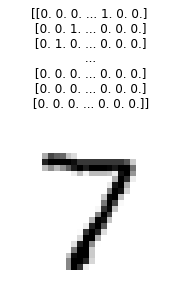

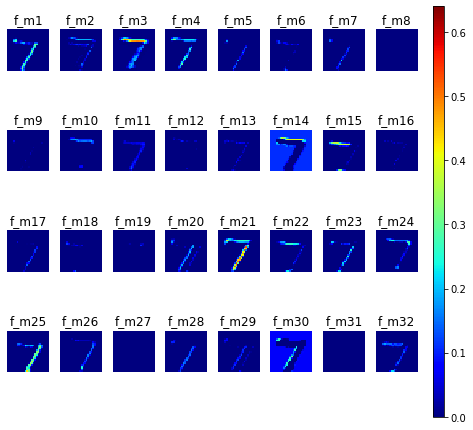

In [12]:
plot_featureMaps(x_test,model,layer_name=model.layers[1].name,n_rows=4,n_cols=8)

In [15]:
Capa convolucional 2

SyntaxError: invalid syntax (3895982225.py, line 1)

313/313 [==============================] - 3s 9ms/step
Shape (10000, 11, 11, 32)
313/313 [==============================] - 2s 7ms/step


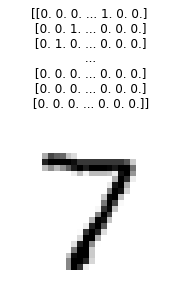

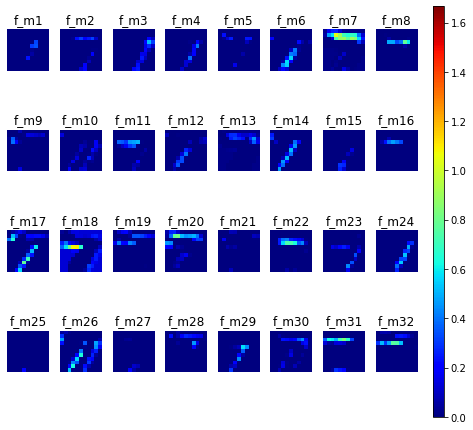

In [13]:
plot_featureMaps(x_test,model,layer_name=model.layers[3].name,n_rows=4,n_cols=8)

Capa convolucional 3

313/313 [==============================] - 3s 8ms/step
Shape (10000, 3, 3, 32)
313/313 [==============================] - 2s 7ms/step


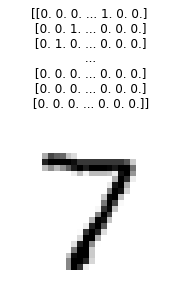

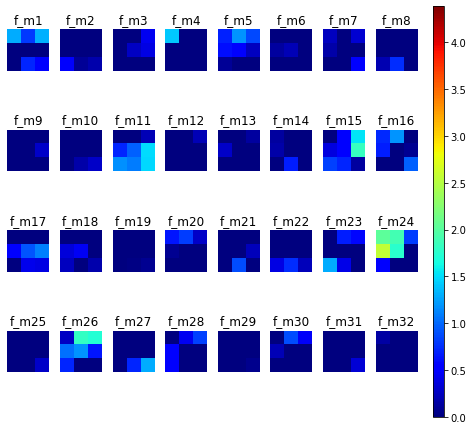

In [14]:
plot_featureMaps(x_test,model,layer_name=model.layers[5].name,n_rows=4,n_cols=8)

In [16]:
def plot_filters(model,layer_name,n_rows=4,n_cols=4):
    print('Filtros capa '+layer_name)
    print(model.get_layer(layer_name).get_weights()[0].shape)
    z = model.get_layer(layer_name).get_weights()[0]
    f, ax = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(6,6))
    index = 0
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            pb = ax[row,col].imshow(z[:,:,0,index], cmap="jet", interpolation="nearest",vmin=z.min(),vmax=z.max())
            ax[row,col].axis('off')
            ax[row,col].set_title("f" + str(index+1), fontsize=12)
            
    plt.tight_layout()
    cbar_ax = f.add_axes([1.01, 0, 0.025, 0.95])
    f.colorbar(pb,shrink=0.25, cax=cbar_ax)    
    #save_fig('fashion_mnist_plot', tight_layout=False)
    plt.show() 
    return



Filtros capa convolucional 1

Filtros capa conv2d
(3, 3, 1, 32)


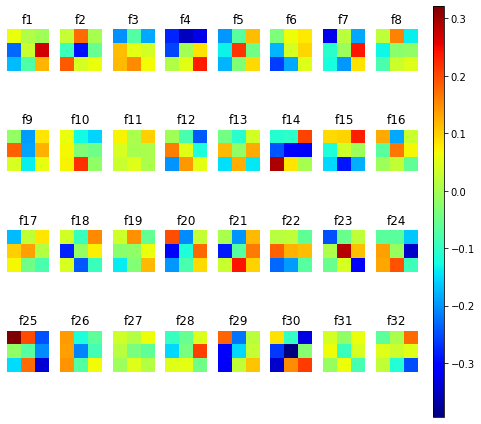

In [17]:
plot_filters(model,layer_name=model.layers[1].name,n_rows=4,n_cols=8)

Filtros capa convolucional 2

Filtros capa conv2d_1
(3, 3, 32, 32)


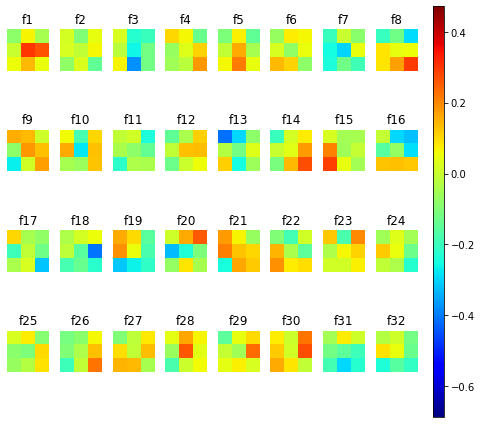

In [19]:
plot_filters(model,layer_name=model.layers[3].name,n_rows=4,n_cols=8)

Filtros capa convolucional 3

Filtros capa conv2d_2
(3, 3, 32, 32)


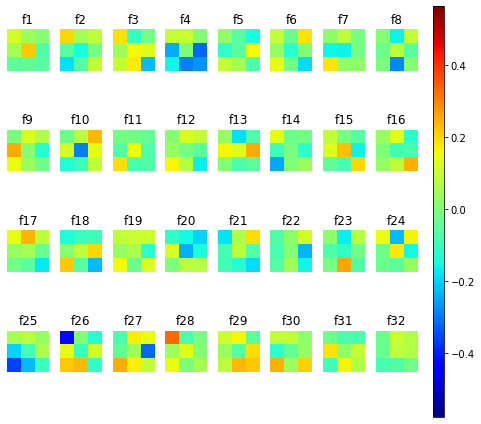

In [20]:
plot_filters(model,layer_name=model.layers[5].name,n_rows=4,n_cols=8)